# CS109 - Final Project - Market Predictors

## Exploratory Data Analysis

Using [TA-Lib : Technical Analysis Library](http://ta-lib.org/)  
Also good: [Technical analysis documentation](http://tadoc.org/)

###### Notes:
I started analyzing the data provided by my company and wasn't happy with what our systems provided for several reasons--
- We had no control over the parameters used to create the features/indicators (e.g., specifying how many days used to calculate moving averages, or specifying the time periods for the Aroon Oscillator, etc.)
- It wasn't reproducible. Every data-load for a new index or investment would require a new manual feed. Fetching the data and loading from "scratch" allows us to streamline the entire process.
- The process of retrieving the manual feeds was quite laborious. They say that the best programmers are lazy ones (who write code to accomplish things rather than doing a lot of work).

I noticed that literally all of the historical data/metrics/indicators were derived from the basics (date, open, high, low, close, volume). And the basics are offered for download via API from many sources (like Yahoo Finance (used through matplotlib (!) below)).  

I thought I was going to need to implement the calculations/formulas/coding to re-create all of the features/indicators, but after a quick google search of "technical analysis python," I discovered "TA-Lib", an open-source, multi-platform library (with a python wrapper) that has already implemented more features/indicators than we can use.

To use talib, you'll have to [Install it](http://mrjbq7.github.io/ta-lib/install.html), but it is FAST and works VERY well.

- Windows user: it's a pain to compile ta-lib if environment isn't setup correctly. Get [compiled binary](http://www.lfd.uci.edu/~gohlke/pythonlibs/) and run "pip install TA_Lib-0.4.9-cp27-none-win_amd64.whl". 

You can see the flow of my explorations below, culminating in one pandas dataframe containing five full years of daily data for symbol "UXI" (ProShares Ultra Industrials--chosen at random) saved to a csv file ("UXI.csv").

There's still LOTS to do, including:
- adding signal strategies using some of the trend data
- tweaking the parameters for all of the indicators we intend to use
- adding (there are many more available) or removing features/indicators
- standardizing/normalizing the data
- etc...

But I'm planning to focus on HW5 for the next few days, so I wanted to get this into your hands as early as possible. Also--I'm writing these notes more as a diary (before I forget what I've done and the reason for doing it) and to communicate the status to you--I don't intend for this to be in the final product (as is, anyway!).

I've provided several links in this document--well worth exploring.
See you Saturday @ 8:30pm.


In [1]:
import talib
import datetime
import numpy as np
import matplotlib.colors as colors
import matplotlib.finance as finance
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [2]:
#Examples playing around with talib
#from: http://mrjbq7.github.io/ta-lib/index.html

from talib import MA_Type

#upper, middle, lower = talib.BBANDS(close, matype=MA_Type.T3)

#momentum = talib.MOM(close, timeperiod=5)

# note that all ndarrays must be the same length!
inputs = {
    'open': np.random.random(100),
    'high': np.random.random(100),
    'low': np.random.random(100),
    'close': np.random.random(100),
    'volume': np.random.random(100)
}
input_arrays = {
    'open': np.random.random(100),
    'high': np.random.random(100),
    'low': np.random.random(100),
    'close': np.random.random(100),
    'volume': np.random.random(100)
}

from talib import abstract
sma = abstract.SMA
sma = abstract.Function('sma')

from talib.abstract import *
output = SMA(input_arrays, timeperiod=25) # calculate on close prices by default
output = SMA(input_arrays, timeperiod=25, price='open') # calculate on opens
upper, middle, lower = BBANDS(input_arrays, 20, 2, 2)
slowk, slowd = STOCH(input_arrays, 5, 3, 0, 3, 0) # uses high, low, close by default
slowk, slowd = STOCH(input_arrays, 5, 3, 0, 3, 0, prices=['high', 'low', 'open'])

### Here are all the functions (and functions by group) offered through talib

#### Many details on each technical analysis indicator: [SparkCharts](http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators)

In [3]:
#talib functions
print talib.get_functions()
print talib.get_function_groups()

['ATR', 'NATR', 'TRANGE', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'BETA', 'CORREL', 'LINEARREG', 'LINEARREG_ANGLE', 'LINEARREG_INTERCEPT', 'LINEARREG_SLOPE', 'STDDEV', 'TSF', 'VAR', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE', 'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGI

In [256]:
#Example of fetching Yahoo historical data
#from: http://matplotlib.org/examples/pylab_examples/finance_work2.html

import pandas as pd
startdate = datetime.date(2008, 1, 1)
today = enddate = datetime.date(2015, 11, 20)#datetime.date.today()
ticker = 'SPY'   # '^GSPC'

fh = finance.fetch_historical_yahoo(ticker, startdate, enddate)
# a numpy record array with fields: date, open, high, low, close, volume, adj_close)

r = mlab.csv2rec(fh)
fh.close()

# this sort always crashes my ipython kernel, not sure why, will do the sort in dataframe below
#r.sort()

In [257]:
#Copy to pandas dataframe

# sort dataframe here instead of r.sort()
df = pd.DataFrame(data = r, columns=['date', 'open', 'high', 'low', 'close', 'volume', 'adj_close']).sort('date')
df['volume'] = df['volume'].astype(float)
df.head()

,date,open,high,low,close,volume,adj_close
1987,2008-01-02,146.529999,146.990005,143.880005,144.929993,204935600,123.175129
1986,2008-01-03,144.910004,145.490005,144.070007,144.860001,125133300,123.115644
1985,2008-01-04,143.339996,143.440002,140.910004,141.309998,232330900,120.098517
1984,2008-01-07,141.809998,142.229996,140.100006,141.190002,234991000,119.996534
1983,2008-01-08,142.080002,142.899994,138.440002,138.910004,326365700,118.058777


Note: "adj_close" is close price adjusted for dividends and splits.

In [258]:
del df['adj_close']

In [259]:
# How to measure
# First, let's get next day's performance
df['close_1'] = np.roll(df['close'],-1)
df['result_1'] = df['close_1'] > df['close']
df['perf_1'] = (df['close_1']-df['close'])/df['close']

# I think a better measure would be 14 days' performance
df['close_14'] = np.roll(df['close'],-13)
df['result_14'] = df['close_14'] > df['close']
df['perf_14'] = (df['close_14']-df['close'])/df['close']

#An even better measure:
#The Golden Rule of investing is “buy low, sell high.” After analyzing the detail in investment charts, 
#the best performance would be obtained by “buying” when the index is in a trough, and selling when the 
#index is at a peak.
#We manually examined two years of peaks and troughs to come up with an “ideal” in/out scenario.
#We determined that the peaks and troughs could be recognized to a great degree based on the close price 
#versus the moving average close price +/-5 days (within a tolerance).
#Formula: Given “prior tolerance (pt) = 0.2%” and “future tolerance (ft) = 0.5%”
#“Sell” if ((closing price * (1+pt)) > EMA[-5]) 
#	AND (closing price * (1+ft) > EMA[+5])
#“Buy” if ((closing price * (1-pt)) < EMA[-5])
# 	AND (closing price * (1-ft) < EMA[+5])
#otherwise, Hold.
#Using this formula, we could create excellent buy/sell “actual” signals that would maximize up-trends 
#(by buying in troughs) and minimize downside exposure (by selling at peaks).
#Our goal would be to match these signals through prior data alone, given that we won’t have the future 
#5-day moving average.
ptol = 0.002
ftol = 0.005
df['ema5p'] = talib.EMA(df['close'].values, timeperiod=5)
df['ema5f'] = np.roll(df['ema5p'],-5)
df['rsell1'] = df['close']*(1+ptol)>df['ema5p']
df['rsell2'] = df['close']*(1+ftol)>df['ema5f']
#df['rsell'] = df['rsell1'] & df['rsell2']
df['rbuy1'] = df['close']*(1-ptol)<df['ema5p']
df['rbuy2'] = df['close']*(1-ftol)<df['ema5f']
df['resultt'] = np.where(df['rsell1']&df['rsell2'], -1, np.where(df['rbuy1']&df['rbuy2'], 1, 0))

del df['ema5p']
del df['ema5f']
del df['rsell1']
del df['rsell2']
del df['rbuy1']
del df['rbuy2']

#Idea/logic from http://stackoverflow.com/questions/25119524/pandas-conditional-rolling-count
def rolling_fill(val):
    rtouse = val
    if val == 0:
        rtouse = rolling_fill.previous
    else:
        rolling_fill.previous = val
    return rtouse

rolling_fill.previous = None #static variable
df['results'] = df['resultt'].apply(rolling_fill)
df['results'] = (df['results']+1)/2

del df['resultt']

In [260]:
#Create new fields for various technical indicators directly from talib

#Bolinger Bands

#Developed by John Bollinger, Bollinger Bands® are volatility bands placed above and below a moving average. 
#Volatility is based on the standard deviation, which changes as volatility increases and decreases. 
#The bands automatically widen when volatility increases and narrow when volatility decreases.

df['bb_upper'], df['bb_middle'], df['bb_lower'] = talib.BBANDS(df['close'].values, timeperiod=20,
                                                              nbdevup=2, nbdevdn=2, matype=0)
df['bb_pct'] = (df['close'] - df['bb_lower'])/(df['bb_upper'] - df['bb_lower'])
df['bb_bandwidth'] = ( (df['bb_upper'] - df['bb_lower']) / df['bb_middle']) * 100

#Bollinger BandWidth is best known for identifying The Squeeze. This occurs when volatility falls to a very 
#low level, as evidenced by the narrowing bands. The upper and lower bands are based on the standard deviation, 
#which is a measure of volatility. The bands narrow as price flattens or moves within a relatively narrow range. 
#The theory is that periods of low volatility are followed by periods of high volatility. Relatively narrow 
#BandWidth (a.k.a. the Squeeze) can foreshadow a significant advance or decline. After a Squeeze, a price surge 
#and subsequent band break signal the start of a new move. A new advance starts with a Squeeze and subsequent 
#break above the upper band. A new decline starts with a Squeeze and subsequent break below the lower band.

df['bb_squeeze'] = df['bb_bandwidth'] < (pd.rolling_mean(df['bb_bandwidth'].values, window=200)*0.4)
df['bb_signalup'] = df['close'] > df['bb_upper']
df['bb_signaldn'] = df['close'] < df['bb_lower']
df['bb_signalt'] = (np.where(df['bb_squeeze'], np.where(df['bb_signalup'], 1, np.where(df['bb_signaldn'], -1, 0)), 0))

#bb_signal should be 1 (buy) or -1 (sell). A "0" is a "hold" and should be replaced with the last 1 or -1.
#df['bb_signal'] = np.where(df['bb_signalt']==0,np.roll(df['bb_signalt'],1),df['bb_signalt'])

rolling_fill.previous = None #static variable
df['bb_signal'] = df['bb_signalt'].apply(rolling_fill)
df['bb_signal'] = (df['bb_signal']+1)/2
df['bb_signal'].fillna(0, inplace=True)

del df['bb_signalt']
#df.head(100)

In [261]:
df[df.date>datetime.date(2013, 3, 25)].head(10)

,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,...,results,bb_upper,bb_middle,bb_lower,bb_pct,bb_bandwidth,bb_squeeze,bb_signalup,bb_signaldn,bb_signal
671,2013-03-26,155.589996,156.229996,155.419998,156.190002,86856600,156.190002,False,0.000000,155.119995,...,0,157.596596,154.705000,151.813403,0.756779,3.738207,False,False,False,1
670,2013-03-27,155.259995,156.240005,155.000000,156.190002,99950600,156.669998,True,0.003073,157.410004,...,0,157.575462,154.919000,152.262537,0.739228,3.429486,False,False,False,1
669,2013-03-28,156.089996,156.850006,155.750000,156.669998,102932800,156.050003,False,-0.003957,155.110001,...,0,157.457620,155.171999,152.886378,0.827701,2.945919,False,False,False,1
668,2013-04-01,156.589996,156.910004,155.669998,156.050003,99194100,156.820007,True,0.004934,154.139999,...,0,157.198709,155.368999,153.539289,0.686096,2.355309,False,False,False,1
667,2013-04-02,156.610001,157.210007,156.369995,156.820007,101504300,155.229996,False,-0.010139,155.479996,...,0,157.118767,155.564000,154.009233,0.903921,1.998878,False,False,False,1
666,2013-04-03,156.910004,157.029999,154.820007,155.229996,154167400,155.860001,True,0.004059,156.169998,...,1,157.062261,155.611000,154.159739,0.368733,1.865242,True,False,False,1
665,2013-04-04,155.429993,156.169998,155.089996,155.860001,131885000,155.160004,False,-0.004491,157.779999,...,1,157.040322,155.679000,154.317678,0.566480,1.748883,True,False,False,1
664,2013-04-05,153.949997,155.350006,153.770004,155.160004,159666000,156.210007,True,0.006767,157.880005,...,1,157.018600,155.698000,154.377400,0.296306,1.696361,True,False,False,1
663,2013-04-08,155.270004,156.220001,154.750000,156.210007,86571200,156.750000,True,0.003457,158.520004,...,1,157.069607,155.736501,154.403394,0.677595,1.712003,True,False,False,1
662,2013-04-09,156.500000,157.320007,155.979996,156.750000,101922200,158.669998,True,0.012249,158.240005,...,0,157.172571,155.772501,154.372430,0.849089,1.797583,True,False,False,1


In [262]:
#Moving averages smooth the price data to form a trend following indicator. They do not predict price 
#direction, but rather define the current direction with a lag. Moving averages lag because they are based 
#on past prices.

#Exponential Moving Average
#Exponential moving averages have less lag and are therefore more sensitive to recent prices - 
#and recent price changes. Exponential moving averages will turn before simple moving averages.

df['ema50'] = talib.EMA(df['close'].values, timeperiod=50)
df['ema150'] = talib.EMA(df['close'].values, timeperiod=150)
df['ema200'] = talib.EMA(df['close'].values, timeperiod=200)

#Trend Identification
#The direction of the moving average conveys important information about prices. 
#A rising moving average shows that prices are generally increasing. 
#A falling moving average indicates that prices, on average, are falling.

#Price Crossovers
#Moving averages can be used to generate signals with simple price crossovers. 
#A bullish signal is generated when prices move above the moving average. 
#A bearish signal is generated when prices move below the moving average.

df['ema_signal1'] = 1*(df['close'] > df['ema150'])

#Double Crossovers
#Two moving averages can be used together to generate crossover signals. 
#In Technical Analysis of the Financial Markets, John Murphy calls this the “double crossover method”. 
#Double crossovers involve one relatively short moving average and one relatively long moving average. 
#As with all moving averages, the general length of the moving average defines the timeframe for the system. 
#A system using a 50-day SMA and 200-day SMA would be deemed medium-term, perhaps even long-term.
#A bullish crossover occurs when the shorter moving average crosses above the longer moving average. 
#This is also known as a golden cross. A bearish crossover occurs when the shorter moving average crosses 
#below the longer moving average. This is known as a dead cross.

df['ema_signal2'] = 1*(df['ema50'] > df['ema200'])


#Double Exponential Moving Average
#df['dema50'] = talib.DEMA(df['close'].values, timeperiod=50)
#df['dema100'] = talib.DEMA(df['close'].values, timeperiod=100)
#df['dema200'] = talib.DEMA(df['close'].values, timeperiod=200)

#Weighted Moving Average
#df['wma50'] = talib.WMA(df['close'].values, timeperiod=50)
#df['wma100'] = talib.WMA(df['close'].values, timeperiod=100)
#df['wma200'] = talib.WMA(df['close'].values, timeperiod=200)

#Simple Moving Average
#df['sma50'] = talib.SMA(df['close'].values, timeperiod=50)
#df['sma100'] = talib.SMA(df['close'].values, timeperiod=100)
#df['sma200'] = talib.SMA(df['close'].values, timeperiod=200)

#Moving Average Shell
#df['ma50'] = talib.MA(df['close'].values, timeperiod=50, matype=0)
#df['ma100'] = talib.MA(df['close'].values, timeperiod=100, matype=0)
#df['ma200'] = talib.MA(df['close'].values, timeperiod=200, matype=0)

df.tail(50)

,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,...,bb_bandwidth,bb_squeeze,bb_signalup,bb_signaldn,bb_signal,ema50,ema150,ema200,ema_signal1,ema_signal2
49,2015-09-14,196.949997,197.009995,195.429993,195.979996,79452000,198.449997,True,0.012603,192.160004,...,12.318710,False,False,False,1,202.668703,205.464923,204.711617,0,0
48,2015-09-15,196.610001,198.990005,195.960007,198.449997,113806200,200.139999,True,0.008516,194.990005,...,10.829713,False,False,False,1,202.503264,205.372010,204.649312,0,0
47,2015-09-16,198.820007,200.410004,198.410004,200.139999,99581600,199.699997,False,-0.002198,198.479996,...,9.205385,False,False,False,1,202.410587,205.302712,204.604443,0,0
46,2015-09-17,200.020004,202.889999,199.279999,199.699997,276046600,195.360001,False,-0.021733,197.809998,...,7.618296,False,False,False,1,202.304289,205.228503,204.555643,0,0
45,2015-09-18,195.710007,198.679993,194.960007,195.360001,223657500,196.440002,True,0.005528,199.429993,...,6.698865,False,False,False,1,202.031964,205.097795,204.464144,0,0
44,2015-09-21,196.440002,197.679993,195.210007,196.440002,105726200,193.899994,False,-0.012930,201.199997,...,6.652060,False,False,False,1,201.812672,204.983122,204.384301,0,0
43,2015-09-22,193.880005,194.460007,192.559998,193.899994,153890900,193.600006,False,-0.001547,201.399994,...,6.062843,False,False,False,1,201.502371,204.836326,204.279980,0,0
42,2015-09-23,194.110001,194.669998,192.910004,193.600006,91273100,192.929993,False,-0.003461,201.589996,...,4.655123,False,False,False,1,201.192474,204.687500,204.173712,0,0
41,2015-09-24,192.149994,193.449997,190.559998,192.929993,159378800,192.869995,False,-0.000311,200.179993,...,4.839653,False,False,False,1,200.868455,204.531772,204.061834,0,0
40,2015-09-25,194.639999,195.000000,191.809998,192.869995,142052900,187.910004,False,-0.025717,199.300003,...,4.839230,False,False,False,1,200.554790,204.377311,203.950472,0,0


In [263]:
#Kaufman Adaptive Moving Average
#Developed by Perry Kaufman, Kaufman's Adaptive Moving Average (KAMA) is a moving average designed 
#to account for market noise or volatility. KAMA will closely follow prices when the price swings are 
#relatively small and the noise is low. KAMA will adjust when the price swings widen and follow prices 
#from a greater distance. This trend-following indicator can be used to identify the overall trend, 
#time turning points and filter price movements.

#Chartists can use KAMA like any other trend following indicator, such as a moving average. 
#Chartists can look for price crosses, directional changes and filtered signals.

df['kama50'] = talib.KAMA(df['close'].values, timeperiod=50)
df['kama150'] = talib.KAMA(df['close'].values, timeperiod=150)
df['kama200'] = talib.KAMA(df['close'].values, timeperiod=200)

df['kama_signal1'] = 1*(df['close'] > df['kama150'])
df['kama_signal2'] = 1*(df['kama50'] > df['kama200'])

In [264]:
#Parabolic SAR
#Developed by Welles Wilder, the Parabolic SAR refers to a price-and-time-based trading system. 
#Wilder called this the “Parabolic Time/Price System.” SAR stands for “stop and reverse,” which is the 
#actual indicator used in the system. SAR trails price as the trend extends over time. The indicator is 
#below prices when prices are rising and above prices when prices are falling. In this regard, the indicator 
#stops and reverses when the price trend reverses and breaks above or below the indicator.

df['sar'] = talib.SAR(df['high'].values, df['low'].values, acceleration=0.02, maximum=0.2)
df['sar_signal'] = 1*(df['close'] > df['sar'])

In [265]:
#Average Directional Movement Index
#The Average Directional Index (ADX), Minus Directional Indicator (-DI) and Plus Directional Indicator (+DI) 
#represent a group of directional movement indicators that form a trading system developed by Welles Wilder. 
#Wilder designed ADX with commodities and daily prices in mind, but these indicators can also be applied to stocks. 
#The Average Directional Index (ADX) measures trend strength without regard to trend direction. The other two 
#indicators, Plus Directional Indicator (+DI) and Minus Directional Indicator (-DI), complement ADX by defining 
#trend direction. Used together, chartists can determine both the direction and strength of the trend.

df['adx'] = talib.ADX(df['high'].values, df['low'].values, df['close'].values, timeperiod=14)
df['plus_di'] = talib.PLUS_DI(df['high'].values, df['low'].values, df['close'].values, timeperiod=14)
df['minus_di'] = talib.MINUS_DI(df['high'].values, df['low'].values, df['close'].values, timeperiod=14)

df['adx_trend'] = df['adx'] > 22
df['adx_direction'] = df['plus_di'] > df['minus_di']
df['adx_signalt'] = np.where(df['adx_trend'], np.where(df['adx_direction'],1,-1), 0)

rolling_fill.previous = None #static variable
df['adx_signal'] = df['adx_signalt'].apply(rolling_fill)
df['adx_signal'] = (df['adx_signal']+1)/2

del df['adx_signalt']

In [266]:
#Aroon
#Developed by Tushar Chande in 1995, Aroon is an indicator system that determines whether a stock is 
#trending or not and how strong the trend is. The Aroon indicators measure the number of periods since 
#price recorded an x-day high or low. There are two separate indicators: Aroon-Up and Aroon-Down. 
#A 25-day Aroon-Up measures the number of days since a 25-day high. A 25-day Aroon-Down measures the 
#number of days since a 25-day low.

#df['aroon_dn'], df['aroon_up'] = talib.AROON(df['high'].values, df['low'].values, timeperiod=25)

#Aroon Oscillator
#The Aroon Oscillator is the difference between Aroon-Up and Aroon-Down. These two indicators are usually 
#plotted together for easy comparison, but chartists can also view the difference of these two indicators 
#with the Aroon Oscillator. This indicator fluctuates between -100 and +100 with zero as the middle line. 
#A upward trend bias is present when the oscillator is positive, while a downward trend bias exists when the 
#oscillator is negative.

df['aroon_osc'] = talib.AROONOSC(df['high'].values, df['low'].values, timeperiod=25)

df['aroon_signal'] = 1*(df['aroon_osc'] >= 0)

In [267]:
#Commodity Channel Index
#Developed by Donald Lambert and featured in Commodities magazine in 1980, the Commodity Channel Index (CCI) 
#is a versatile indicator that can be used to identify a new trend or warn of extreme conditions. 
#Lambert originally developed CCI to identify cyclical turns in commodities, but the indicator can successfully 
#applied to indices, ETFs, stocks and other securities. In general, CCI measures the current price level relative 
#to an average price level over a given period of time. CCI is relatively high when prices are far above their 
#average. CCI is relatively low when prices are far below their average. In this manner, CCI can be used to 
#identify overbought and oversold levels.

df['cci'] = talib.CCI(df['high'].values, df['low'].values, df['close'].values, timeperiod=14)

#The definition of overbought or oversold varies for the Commodity Channel Index (CCI). 
#±100 may work in a trading range, but more extreme levels are needed for other situations. 
#±200 is a much harder level to reach and more representative of a true extreme.

df['cci_signalt'] = np.where(df['cci'] < -200, 1, np.where(df['cci'] > 200, -1, 0))

rolling_fill.previous = None #static variable
df['cci_signal'] = df['cci_signalt'].apply(rolling_fill)
df['cci_signal'] = (df['cci_signal']+1)/2

del df['cci_signalt']

In [268]:
#Moving Average Convergence/Divergence
#Developed by Gerald Appel in the late seventies, the Moving Average Convergence/Divergence oscillator 
#(MACD) is one of the simplest and most effective momentum indicators available. The MACD turns two 
#trend-following indicators, moving averages, into a momentum oscillator by subtracting the longer moving 
#average from the shorter moving average. As a result, the MACD offers the best of both worlds: trend 
#following and momentum. The MACD fluctuates above and below the zero line as the moving averages converge, 
#cross and diverge. Traders can look for signal line crossovers, centerline crossovers and divergences to 
#generate signals. 

#Interpretation
#As its name implies, the MACD is all about the convergence and divergence of the two moving averages. 
#Convergence occurs when the moving averages move towards each other. 
#Divergence occurs when the moving averages move away from each other. 
#The shorter moving average (12-day) is faster and responsible for most MACD movements. 
#The longer moving average (26-day) is slower and less reactive to price changes in the underlying security.

#The MACD Line oscillates above and below the zero line, which is also known as the centerline. 
#These crossovers signal that the 12-day EMA has crossed the 26-day EMA. 
#The direction, of course, depends on the direction of the moving average cross. 
#Positive MACD indicates that the 12-day EMA is above the 26-day EMA. 
#Positive values increase as the shorter EMA diverges further from the longer EMA. 
#This means upside momentum is increasing. 
#Negative MACD values indicates that the 12-day EMA is below the 26-day EMA. 
#Negative values increase as the shorter EMA diverges further below the longer EMA. 
#This means downside momentum is increasing.

#Signal line crossovers are the most common MACD signals. 
#The signal line is a 9-day EMA of the MACD Line. As a moving average of the indicator, 
#it trails the MACD and makes it easier to spot MACD turns. A bullish crossover occurs 
#when the MACD turns up and crosses above the signal line. A bearish crossover occurs when 
#the MACD turns down and crosses below the signal line. Crossovers can last a few days or 
#a few weeks, it all depends on the strength of the move.

df['macd'], df['macd_sigline'], df['macd_hist'] = talib.MACD(df['close'].values,
                                                           fastperiod=12, slowperiod=26, signalperiod=9)
df['macd_signal'] = 1*(df['macd_hist'] > 0)

In [269]:
#Percentage Price Oscillator
#The Percentage Price Oscillator (PPO) is a momentum oscillator that measures the difference between two 
#moving averages as a percentage of the larger moving average. As with its cousin, MACD, the Percentage 
#Price Oscillator is shown with a signal line, a histogram and a centerline. Signals are generated with 
#signal line crossovers, centerline crossovers and divergences. Because these signals are no different 
#than those associated with MACD, this article will focus on a few differences between the two. 
#First, PPO readings are not subject to the price level of the security. Second, PPO readings for different 
#securities can be compared, even when there are large differences in the price.

df['ppo'] = talib.PPO(df['close'].values, fastperiod=12, slowperiod=26, matype=0)

df['ppo_signal'] = 1*(df['ppo'] > 0)

In [270]:
#Money Flow Index
#The Money Flow Index (MFI) is an oscillator that uses both price and volume to measure buying and selling 
#pressure. Created by Gene Quong and Avrum Soudack, MFI is also known as volume-weighted RSI. MFI starts 
#with the typical price for each period. Money flow is positive when the typical price rises (buying pressure) 
#and negative when the typical price declines (selling pressure). 

#Overbought and oversold levels can be used to identify unsustainable price extremes. 
#Typically, MFI above 80 is considered overbought and MFI below 20 is considered oversold. 
#Strong trends can present a problem for these classic overbought and oversold levels. 
#MFI can become overbought (>80) and prices can simply continue higher when the uptrend is strong. 
#Conversely, MFI can become oversold (<20) and prices can simply continue lower when the downtrend is strong.

df['mfi'] = talib.MFI(df['high'].values, df['low'].values, df['close'].values, df['volume'].values, timeperiod=14)

df['mfi_signalt'] = np.where(df['mfi'] < 20, 1, np.where(df['mfi'] > 80, -1, 0))

rolling_fill.previous = None #static variable
df['mfi_signal'] = df['mfi_signalt'].apply(rolling_fill)
df['mfi_signal'] = (df['mfi_signal']+1)/2

del df['mfi_signalt']

In [271]:
#Rate of change percentage
#The Rate-of-Change (ROC) indicator, which is also referred to as simply Momentum, is a pure momentum 
#oscillator that measures the percent change in price from one period to the next. The ROC calculation 
#compares the current price with the price “n” periods ago. The plot forms an oscillator that fluctuates 
#above and below the zero line as the Rate-of-Change moves from positive to negative.

df['roc'] = 100*talib.ROCP(df['close'].values, timeperiod=10)

#The 20-day Rate-of-Change indicator sets overbought at +10% and oversold at -10%.

df['roc_signalt'] = np.where(df['roc'] < -10, 1, np.where(df['roc'] > 10, -1, 0))

rolling_fill.previous = None #static variable
df['roc_signal'] = df['roc_signalt'].apply(rolling_fill)
df['roc_signal'] = (df['roc_signal']+1)/2

del df['roc_signalt']

In [272]:
#Relative Strength Index
#Developed J. Welles Wilder, the Relative Strength Index (RSI) is a momentum oscillator that measures the 
#speed and change of price movements. RSI oscillates between zero and 100. Traditionally, and according to 
#Wilder, RSI is considered overbought when above 70 and oversold when below 30. Signals can also be generated 
#by looking for divergences, failure swings and centerline crossovers. RSI can also be used to identify the 
#general trend.

df['rsi'] = talib.RSI(df['close'].values, timeperiod=14)

df['rsi_signalt'] = np.where(df['rsi'] < 30, 1, np.where(df['rsi'] > 70, -1, 0))

rolling_fill.previous = None #static variable
df['rsi_signal'] = df['rsi_signalt'].apply(rolling_fill)
df['rsi_signal'] = (df['rsi_signal']+1)/2

del df['rsi_signalt']

In [273]:
#Ultimate Oscillator
#Developed by Larry Williams in 1976 and featured in Stocks & Commodities Magazine in 1985, the Ultimate 
#Oscillator is a momentum oscillator designed to capture momentum across three different time frames. 
#The multiple time frame objective seeks to avoid the pitfalls of other oscillators. Many momentum oscillators 
#surge at the beginning of a strong advance and then form bearish divergence as the advance continues. 
#This is because they are stuck with one time frame. The Ultimate Oscillator attempts to correct this fault 
#by incorporating longer time frames into the basic formula. Williams identified a buy signal a based on a 
#bullish divergence and a sell signal based on a bearish divergence.

df['ult_osc'] = talib.ULTOSC(df['high'].values, df['low'].values, df['close'].values, 
                            timeperiod1=7, timeperiod2=14, timeperiod3=28)

#Simplified, the ultimate oscillator is considered overbought when above 70 and oversold when below 30.

df['ult_signalt'] = np.where(df['ult_osc'] < 30, 1, np.where(df['ult_osc'] > 70, -1, 0))

rolling_fill.previous = None #static variable
df['ult_signal'] = df['ult_signalt'].apply(rolling_fill)
df['ult_signal'] = (df['ult_signal']+1)/2

del df['ult_signalt']

In [274]:
#Williams' %R
#Developed by Larry Williams, Williams %R is a momentum indicator that is the inverse of the Fast 
#Stochastic Oscillator. Also referred to as %R, Williams %R reflects the level of the close relative 
#to the highest high for the look-back period. In contrast, the Stochastic Oscillator reflects the level 
#of the close relative to the lowest low. %R corrects for the inversion by multiplying the raw value by -100. 
#As a result, the Fast Stochastic Oscillator and Williams %R produce the exact same lines, only the scaling 
#is different. Williams %R oscillates from 0 to -100.

df['willr'] = talib.WILLR(df['high'].values, df['low'].values, df['close'].values, timeperiod=14)

#Readings from 0 to -20 are considered overbought. Readings from -80 to -100 are considered oversold.

df['wr_signalt'] = np.where(df['willr'] < -80, 1, np.where(df['willr'] > -20, -1, 0))

rolling_fill.previous = None #static variable
df['wr_signal'] = df['wr_signalt'].apply(rolling_fill)
df['wr_signal'] = (df['wr_signal']+1)/2

del df['wr_signalt']

In [275]:
#Chaikin A/D Line
#Developed by Marc Chaikin, the Accumulation Distribution Line is a volume-based indicator designed to 
#measure the cumulative flow of money into and out of a security. Chaikin originally referred to the indicator 
#as the Cumulative Money Flow Line. As with cumulative indicators, the Accumulation Distribution Line is a 
#running total of each period's Money Flow Volume. First, a multiplier is calculated based on the relationship 
#of the close to the high-low range. Second, the Money Flow Multiplier is multiplied by the period's volume to 
#come up with a Money Flow Volume. A running total of the Money Flow Volume forms the Accumulation Distribution 
#Line. Chartists can use this indicator to affirm a security's underlying trend or anticipate reversals when 
#the indicator diverges from the security price.

#df['ad'] = talib.AD(df['high'].values, df['low'].values, df['close'].values, df['volume'].values)

#Chaikin A/D Oscillator
#Trend confirmation is a pretty straight-forward concept. An uptrend in the Accumulation Distribution Line 
#reinforces an uptrend on the price chart and vice versa.

df['ad_osc'] = talib.ADOSC(df['high'].values, df['low'].values, df['close'].values, df['volume'].values,
                          fastperiod=3, slowperiod=10)

df['ad_signal'] = 1*(df['ad_osc'] > 0)

In [276]:
#On Balance Volume
#On Balance Volume (OBV) measures buying and selling pressure as a cumulative indicator that adds volume 
#on up days and subtracts volume on down days. OBV was developed by Joe Granville and introduced in his 1963 
#book, Granville's New Key to Stock Market Profits. It was one of the first indicators to measure positive 
#and negative volume flow. Chartists can look for divergences between OBV and price to predict price movements 
#or use OBV to confirm price trends.

#df['obv'] = talib.OBV(df['close'].values, df['volume'].values)


In [277]:
#Stochastic
#Developed by George C. Lane in the late 1950s, the Stochastic Oscillator is a momentum indicator that shows 
#the location of the close relative to the high-low range over a set number of periods. According to an interview 
#with Lane, the Stochastic Oscillator “doesn't follow price, it doesn't follow volume or anything like that. 
#It follows the speed or the momentum of price. As a rule, the momentum changes direction before price.” As such, 
#bullish and bearish divergences in the Stochastic Oscillator can be used to foreshadow reversals. This was the 
#first, and most important, signal that Lane identified. Lane also used this oscillator to identify bull and bear 
#set-ups to anticipate a future reversal. Because the Stochastic Oscillator is range bound, is also useful for 
#identifying overbought and oversold levels.

df['stoch_slowk'], df['stoch_slowd'] = talib.STOCH(df['high'].values, df['low'].values, df['close'].values, 
                                                   fastk_period=5,
                                                    slowk_period=3,
                                                    slowk_matype=0,
                                                    slowd_period=3,
                                                    slowd_matype=0)

#Traditional settings use 80 as the overbought threshold and 20 as the oversold threshold.

df['sslow_signalt'] = np.where(df['stoch_slowk'] < 20, 1, np.where(df['stoch_slowk'] > 80, -1, 0))

rolling_fill.previous = None #static variable
df['sslow_signal'] = df['sslow_signalt'].apply(rolling_fill)
df['sslow_signal'] = (df['sslow_signal']+1)/2

del df['sslow_signalt']

In [278]:
#Stochastic Relative Strength Index
#Developed by Tushar Chande and Stanley Kroll, StochRSI is an oscillator that measures the level of RSI 
#relative to its high-low range over a set time period. StochRSI applies the Stochastics formula to RSI values, 
#instead of price values. This makes it an indicator of an indicator. The result is an oscillator that 
#fluctuates between 0 and 1.

df['stoch_fastk'], df['stoch_fastd'] = talib.STOCHRSI(df['close'].values, timeperiod=14,
                                                      fastk_period=5, fastd_period=3, fastd_matype=0)

#In their 1994 book, The New Technical Trader, Chande and Kroll explain that RSI can oscillate between 
#80 and 20 for extended periods without reaching extreme levels. Notice that 80 and 20 are used for overbought 
#and oversold instead of the more traditional 70 and 30. Traders looking to enter a stock based on an overbought 
#or oversold reading in RSI might find themselves continuously on the sidelines. Chande and Kroll developed 
#StochRSI to increase sensitivity and generate more overbought/oversold signals.

df['srsi_signalt'] = np.where(df['stoch_fastk'] < 20, 1, np.where(df['stoch_fastk'] > 80, -1, 0))

rolling_fill.previous = None #static variable
df['srsi_signal'] = df['srsi_signalt'].apply(rolling_fill)
df['srsi_signal'] = (df['srsi_signal']+1)/2

del df['srsi_signalt']

In [279]:
#1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
#TRIX is a momentum oscillator that displays the percent rate of change of a triple exponentially smoothed 
#moving average. It was developed in the early 1980's by Jack Hutson, an editor for Technical Analysis of 
#Stocks and Commodities magazine. With its triple smoothing, TRIX is designed to filter insignificant price 
#movements. Chartists can use TRIX to generate signals similar to MACD. A signal line can be applied to look 
#for signal line crossovers. A directional bias can be determined with the absolute level. Bullish and bearish 
#divergences can be used to anticipate reversals.

df['trix'] = talib.TRIX(df['close'].values, timeperiod=30)

df['trix_signal'] = 1*(df['trix'] > 0)

In [280]:
#Derive fields for Support and Resistance

tperiod = 30
lotrade = talib.MIN(df['low'].values, timeperiod=tperiod)
hitrade = talib.MAX(df['high'].values, timeperiod=tperiod)
df['sr_pivotpts'] = (df['high'].values + df['low'].values + df['close'].values)/3
df['sr_res1'] = 2*df['sr_pivotpts'].values - lotrade
df['sr_sup1'] = 2*df['sr_pivotpts'].values - hitrade
df['sr_res2'] = df['sr_pivotpts'].values + (hitrade - lotrade)
df['sr_sup2'] = df['sr_pivotpts'].values - (hitrade - lotrade)
df['sr_res3'] = hitrade + 2*(df['sr_pivotpts'].values - lotrade)
df['sr_sup3'] = lotrade - 2*(hitrade - df['sr_pivotpts'].values)

In [281]:
#Derive Custom Volatility Signal

rangetol1, rangetol2 = 0.005, 0.005
dv = pd.DataFrame(data = r, columns=['date', 'open', 'high', 'low', 'close', 'volume', 'adj_close'])
dv['range'] = dv['high'].values - dv['low'].values
dv['rangepct'] = dv['range'].values/dv['low'].values
dv['prior'] = talib.SUM(dv['close'].values, timeperiod=2) - dv['close'].values
dv['perf'] = (dv['close'].values - dv['prior'].values) / dv['prior'].values
dv['r180'] = pd.rolling_mean(dv['rangepct'].values, window=180)
#dv['vtest1'] = (dv['perf'].values>0 & (dv['rangepct'].values > (dv['r180'].values + rangetol1)))
dv['vtest1a'] = dv['perf'].values > 0
dv['vtest1b'] = (dv['rangepct'].values > (dv['r180'].values + rangetol1))
dv['vtest1'] = dv['vtest1a'] & dv['vtest1b']
#dv['vtest2'] = (dv['perf'].values<0 & (dv['rangepct'].values > (dv['r180'].values + rangetol2)))
dv['vtest2a'] = dv['perf'].values < 0
dv['vtest2b'] = (dv['rangepct'].values > (dv['r180'].values + rangetol2))
dv['vtest2'] = dv['vtest2a'] & dv['vtest2b']
dv['vc'] = dv['vtest1'] | dv['vtest2']
dv['atest1'] = (pd.rolling_sum(dv['vc'], window=3) - dv['vc']) <= 1
dv['atest2'] = pd.rolling_sum(dv['vc'], window=5) == 0.
dv['atest3'] = pd.rolling_sum(dv['vc'], window=15) <= 1.
dv['atest23'] = (dv['atest2'] | dv['atest3'])
dv['in_or_out'] = dv['atest1'] & dv['atest23']
dv['in_or_out_p'] = (pd.rolling_sum(dv['in_or_out'], window=2) - dv['in_or_out']) == 1
dv['in_or_out_e'] = dv['in_or_out'] == dv['in_or_out_p']
dv['cv_signal'] = dv['in_or_out'] & dv['in_or_out_e']

df['cv_signal'] = 1*dv['cv_signal']

In [282]:
df.describe()
df.dtypes
df.head()

,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,...,trix,trix_signal,sr_pivotpts,sr_res1,sr_sup1,sr_res2,sr_sup2,sr_res3,sr_sup3,cv_signal
1987,2008-01-02,146.529999,146.990005,143.880005,144.929993,204935600,144.860001,False,-0.000483,130.720001,...,NaN,0,145.266668,NaN,NaN,NaN,NaN,NaN,NaN,0
1986,2008-01-03,144.910004,145.490005,144.070007,144.860001,125133300,141.309998,False,-0.024506,133.860001,...,NaN,0,144.806671,NaN,NaN,NaN,NaN,NaN,NaN,0
1985,2008-01-04,143.339996,143.440002,140.910004,141.309998,232330900,141.190002,False,-0.000849,134.990005,...,NaN,0,141.886668,NaN,NaN,NaN,NaN,NaN,NaN,0
1984,2008-01-07,141.809998,142.229996,140.100006,141.190002,234991000,138.910004,False,-0.016148,133.039993,...,NaN,0,141.173335,NaN,NaN,NaN,NaN,NaN,NaN,0
1983,2008-01-08,142.080002,142.899994,138.440002,138.910004,326365700,140.369995,True,0.010510,135.240005,...,NaN,0,140.083333,NaN,NaN,NaN,NaN,NaN,NaN,0


In [283]:
df.tail()

,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,...,trix,trix_signal,sr_pivotpts,sr_res1,sr_sup1,sr_res2,sr_sup2,sr_res3,sr_sup3,cv_signal
4,2015-11-16,202.320007,205.690002,202.179993,205.619995,112996000,205.470001,False,-0.000729,141.279999,...,0.042409,1,204.496663,211.993327,197.333323,219.156667,189.836659,226.653331,182.673319,0
3,2015-11-17,205.990005,207.039993,204.880005,205.470001,113429400,208.729996,True,0.015866,138.169998,...,0.045434,1,205.796666,214.113337,199.933329,219.976674,191.616658,228.293345,185.753321,0
2,2015-11-18,206.039993,208.899994,205.990005,208.729996,113064100,208.550003,False,-0.000862,136.979996,...,0.048374,1,207.873332,217.156667,204.086659,220.943340,194.803324,230.226675,191.016651,0
1,2015-11-19,208.589996,209.050003,208.199997,208.550003,81363500,209.309998,True,0.003644,133.429993,...,0.051171,1,208.600001,218.260000,205.539998,221.320003,195.879999,230.980002,192.819996,0
0,2015-11-20,209.449997,210.119995,208.860001,209.309998,89556300,144.929993,False,-0.307582,132.059998,...,0.053905,1,209.429998,219.919994,207.199992,222.150000,196.709996,232.639996,194.479990,0


In [284]:
#Delete oldest data (used only for accurate rolling periods)
df = df[df.date>datetime.date(2010, 1, 1)]
tofile = "data/"+ticker+".csv"
print tofile
#Save df to csv
df.to_csv(tofile, index=False)

data/SPY.csv


In [285]:
def calculate_commission(price, quantity):
    #fix rate pricing from IB including all exchange and regularotry fees
    #https://www.interactivebrokers.com/en/index.php?f=1590&p=stocks1&ns=T
    return np.minimum(np.maximum(0.005*quantity, 1), price*quantity*0.005)

'''
input:
signal_column: name of the column that indicates the signal,  1 for long signal or -1 for short signal
price_column: name of the column responding to order execution price, could be open or close
include_commision: deduct commission for each transaction if True, default to True

output: 
balance, profit, ROI, balance_over_time

NOTE: this is LONG only evaluation, SHORT is not implemented yet. SHORT position will involve margin, so we need to decide 
later.

'''
def evaluate_profit(df, start_date, end_date, intitial_balance, signal_column, price_column, include_commission=True):
    df = df.sort('date')
    df = df[df.date>=start_date][df.date<=end_date]
    
    balance_over_time = []
    balance = intitial_balance
    current_position = 0 #1 for long position, -1 for short, 0 for closed position or no position
    pos_quantity = 0 # current position quantity
    pos_price = 0 #current position price

    #iterate from first to n-1 row, as we want to close our position on the last day.
    for index, row in df.head(-1).iterrows():
        new_position = row[signal_column]
        current_price = row[price_column]
        
        # receive signal to reverse current position
        if current_position != new_position:
            # bullish market: close short position and open a long position
            if new_position == 1:
                #open a long position (short position not implemented yet)
                pos_quantity = np.floor_divide(balance, current_price) 
                balance = balance - current_price * pos_quantity
                if include_commission:
                    balance = balance - calculate_commission(current_price, pos_quantity)
                
                pos_price = current_price
                current_position = new_position
                #print "long ", row['date'], balance, pos_quantity, pos_price
            
            # bearish market: close long position and open a short position
            else:
                #close the long position (short position not implemented yet)
                balance = balance + current_price * pos_quantity
                if include_commission:
                    balance = balance - calculate_commission(current_price, pos_quantity)
                    
                pos_quantity = 0
                pos_price = 0
                current_position = new_position
                #print "close", row['date'], balance, pos_quantity, pos_price
            
        #hold position and do nothing
        else:
            #print "hold ", row['date'], balance, pos_quantity, pos_price
            pass
            
        # capture date and balance at end of day
        balance_over_time.append((row['date'],balance+current_price * pos_quantity))
        
    #found open position on the last day, let's close it
    if pos_quantity != 0:
        # get price of last day
        current_price = df.tail(1).iloc[0][price_column]
        balance = balance + pos_quantity * current_price
        if include_commission:
            balance = balance - calculate_commission(current_price, pos_quantity)
            
    # capture date and balance on last day\n",
    balance_over_time.append((df.tail(1).iloc[0]['date'],balance))
    
    profit = balance - intitial_balance
    ROI = profit/intitial_balance
    
    return  balance, profit, ROI, balance_over_time

In [286]:
'''
if signal is change from 1 to 0
    close existing long position 
    open new short position 
if signal is change from 0 to 1
    close existing short position 
    open new long position
else 
    hold position
'''
def evaluate_profit2(df, start_date, end_date, intitial_balance, signal_column, price_column, include_commission=True):
    df = df.sort('date')
    df = df[df.date>=start_date][df.date<=end_date]
    
    balance_over_time = []
    balance = intitial_balance
    current_position = -1 #1 for long position, 0 for short
    pos_quantity = 0 # current position quantity
    pos_price = 0 #current position price

    #iterate from first to n-1 row, as we want to close our position on the last day.
    for index, row in df.head(-1).iterrows():
        new_position = row[signal_column]
        current_price = row[price_column]
        
        # receive signal to reverse current position
        if current_position != new_position:
            # bullish market: close short position and open a long position
            if new_position == 1:
                #close the short position
                balance = balance + pos_quantity * (2 * pos_price - current_price)
                if include_commission:
                    balance = balance - calculate_commission(current_price, pos_quantity)

                #open a long position 
                pos_quantity = np.floor_divide(balance, current_price) 
                balance = balance - current_price * pos_quantity
                if include_commission:
                    balance = balance - calculate_commission(current_price, pos_quantity)
                
                pos_price = current_price
                current_position = new_position
                #print "long ", row['date'], balance, pos_quantity, pos_price
            
            # bearish market: close long position and open a short position
            else:
                #close the long position
                balance = balance + current_price * pos_quantity
                if include_commission:
                    balance = balance - calculate_commission(current_price, pos_quantity)
                
                #open a short position
                pos_quantity = np.floor_divide(balance, current_price) 
                balance = balance - current_price * pos_quantity
                pos_price = current_price
                current_position = new_position
                #print "close", row['date'], balance, pos_quantity, pos_price
            
        #hold position and do nothing
        else:
            #print "hold ", row['date'], balance, pos_quantity, pos_price
            pass
            
        balance_over_time.append((row['date'],balance+current_price * pos_quantity))
        
    #found open position on the last day, let's close it
    if pos_quantity != 0:
        # get price of last day
        current_price = df.tail(1).iloc[0][price_column]
        
        #close long position
        if current_position == 1:
            balance = balance + pos_quantity * current_price
            if include_commission:
                balance = balance - calculate_commission(current_price, pos_quantity)
        
        #close short position
        else:
            balance = balance + pos_quantity * (2 * pos_price - current_price)
            if include_commission:
                balance = balance - calculate_commission(current_price, pos_quantity)
            
    # capture date and balance on last day",
    balance_over_time.append((df.tail(1).iloc[0]['date'],balance))
    
    profit = balance - intitial_balance
    ROI = profit/intitial_balance
    
    return  balance, profit, ROI, balance_over_time

In [287]:
'''
Example for evaluate_profit() - buy low and sell high based on EMA

'''
start_date = datetime.date(2015, 1, 1)
end_date = datetime.date.today()
df_test = df.copy()

balance, profit, ROI, balance_over_time_EMA = evaluate_profit(df_test, start_date, end_date, 10000, 'results', 'close', False)
print "ROI over {0} days: {1:.2f}%".format((end_date-start_date).days, ROI*100)

balance, profit, ROI,balance_over_time_EMA_short = evaluate_profit2(df_test, start_date, end_date, 10000, 'results', 'close', False)
print "ROI over {0} days: {1:.2f}%".format((end_date-start_date).days, ROI*100)

ROI over 330 days: 46.20%
ROI over 330 days: 108.17%


In [288]:
%matplotlib inline

def plot_balance_over_time(balance_over_time, aLabel):
    dates = list(zip(*balance_over_time)[0])
    balances = list(zip(*balance_over_time)[1])
    plt.plot(dates, balances,label=aLabel)
    plt.legend(frameon=False, loc='upper left')
    plt.ylabel("Balance ($)")
    plt.grid(b=True, which='major',  linewidth=0.2)
               


In [289]:
'''
Example for evaluate_profit() - Maximum gain, N+1

'''
start_date = datetime.date(2015, 1, 1)
end_date = datetime.date.today()
#end_date = datetime.date(2010, 12, 31)
df_test = df.copy()
df_test['result_1'] = df['result_1']*1 # convert signal from true/false to 1/0

balance, profit, ROI, balance_over_time_max_gain = evaluate_profit(df_test, start_date, end_date, 10000, 'result_1', 'close', False)
print "ROI over {0} days: {1:.2f}%".format((end_date-start_date).days, ROI*100)

balance, profit, ROI,balance_over_time_max_gain_short = evaluate_profit2(df_test, start_date, end_date, 10000, 'result_1', 'close', False)
print "ROI over {0} days: {1:.2f}%".format((end_date-start_date).days, ROI*100)

ROI over 330 days: 121.18%
ROI over 330 days: 369.23%


In [290]:
'''
Example for evaluate_profit() -- Baseline, buy and hold 

'''
start_date = datetime.date(2015, 1, 1)
end_date = datetime.date.today()
#end_date = datetime.date(2010, 12, 31)
df_test = df.copy()
df_test['result_baseline'] = np.ones(df.shape[0])

balance, profit, ROI, balance_over_time_baseline = evaluate_profit(df_test, start_date, end_date, 10000, 'result_baseline', 'close', False)
print "ROI over {0} days: {1:.2f}%".format((end_date-start_date).days, ROI*100)

balance, profit, ROI, balance_over_time_baseline_short = evaluate_profit2(df_test, start_date, end_date, 10000, 'result_baseline', 'close', False)
print "ROI over {0} days: {1:.2f}%".format((end_date-start_date).days, ROI*100)

ROI over 330 days: 1.86%
ROI over 330 days: 1.86%


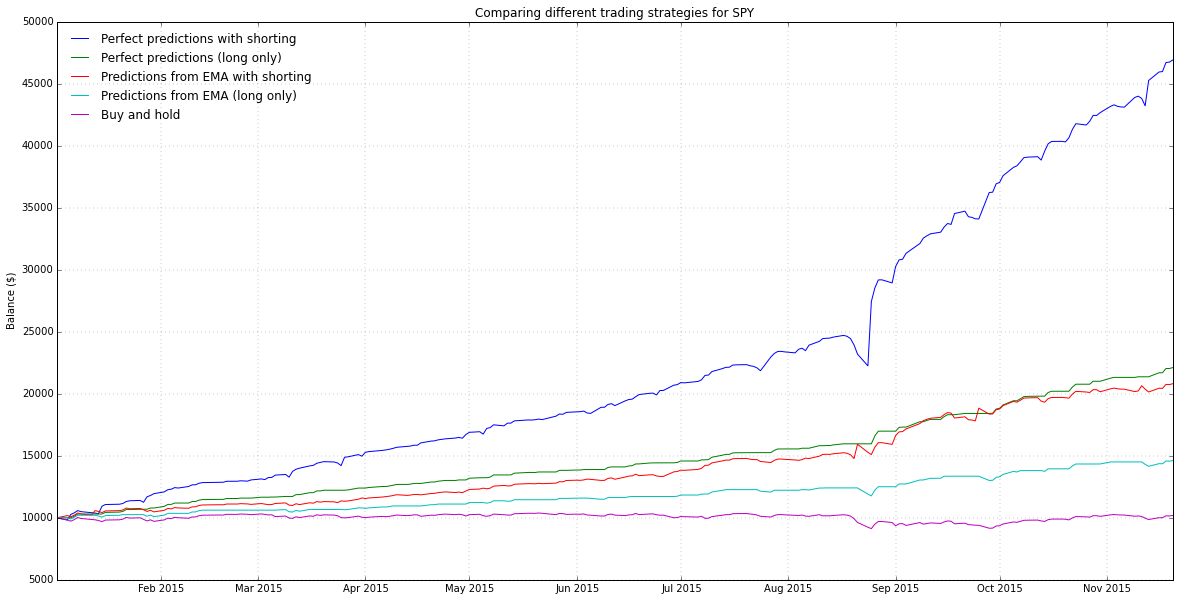

In [292]:
plt.figure(figsize=(20,10)) 
plt.title("Comparing different trading strategies for " + ticker)
plot_balance_over_time(balance_over_time_max_gain_short, "Perfect predictions with shorting")
plot_balance_over_time(balance_over_time_max_gain, "Perfect predictions (long only)")
plot_balance_over_time(balance_over_time_EMA_short, "Predictions from EMA with shorting")
plot_balance_over_time(balance_over_time_EMA, "Predictions from EMA (long only)")
plot_balance_over_time(balance_over_time_baseline, "Buy and hold")
